# Supplementary Material -- Figure S2
### Wind and sea surface temperature anomaly over the Gulf Stream region

This notebook has the code necessary to reproduce Figure S2 in *Villas Bôas, Marechal, and A Bohé, (2025)*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [3]:
lon_min, lon_max, lat_min, lat_max = -80+360, -70.5+360, 31.5, 40

In [4]:
ds_sst = xr.open_dataset('../data/SST_WINDSPEED_ANOM/sept_sst_anom.nc')
ds_windspeed = xr.open_dataset('../data/SST_WINDSPEED_ANOM/sept_windspeed_anom.nc')
ds_sst = ds_sst.mean(dim = 'observations')
ds_windspeed = ds_windspeed.mean(dim = 'observations')

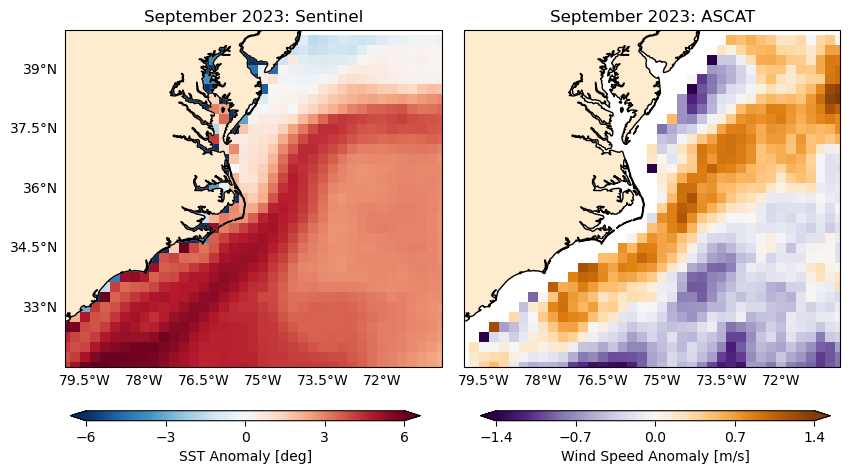

In [5]:
fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)

gl.right_labels = False
gl.left_labels = True
gl.bottom_labels =True
gl.top_labels =False

ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


p1 = ax.pcolormesh(ds_sst.longitude, ds_sst.latitude, ds_sst.sst_anomaly, vmin = -6, vmax = 6, cmap = 'RdBu_r')
plt.title('September 2023: Sentinel')
cax = fig.add_axes([.13, .05, 0.35, 0.02])

cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', ticks = [-6, -3, 0, 3, 6], extend = 'both')
cbar.ax.set_xlabel('SST Anomaly [deg]')

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels =True
gl.top_labels =False

ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)

p2 = ax.pcolormesh(ds_windspeed.longitude, ds_windspeed.latitude, ds_windspeed.wind_anomaly, vmin = -1.4, vmax = 1.4, cmap = 'PuOr_r')
plt.title('September 2023: ASCAT')
cax = fig.add_axes([.54, .05, 0.35, 0.02])
cbar = plt.colorbar(p2, cax = cax, orientation = 'horizontal', ticks = [-1.4, -.7, 0, .7, 1.4], extend =  'both')
cbar.ax.set_xlabel('Wind Speed Anomaly [m/s]')
plt.subplots_adjust(wspace= .06)

plt.savefig('../figures/S02_wind_sst.png', dpi = 300, bbox_inches = 'tight')